In [1]:
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.metrics import pairwise_distances
from tqdm import tqdm
import torch

from module import top_pr
from module import mode_drop
from prdc import compute_prdc

Test whether bandwidth function is correct with crater dataset

7536

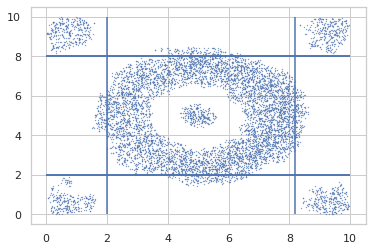

In [2]:
# Import crater dataset
import pickle
f = open("/home/pumjun/Topological_Experiment/crater_tuto", "rb")
crater = pickle.load(f)
f.close()
sns.set(style="whitegrid")
plot.scatter(crater[:,0], crater[:,1], s = 0.1)
plot.vlines(8.2, ymin = 0, ymax = 10)
plot.hlines(8, xmin = 0, xmax = 10)
plot.hlines(2, xmin = 0, xmax = 10)
plot.vlines(2, ymin = 0, ymax = 10)
plot.hlines(8, xmin = 0, xmax = 10)
plot.hlines(2, xmin = 0, xmax = 10)
len(crater)

In [ ]:
bandwidth_lst = np.array([.1,.3,.5,.7,.9])
top_pr.bandwidth_est(crater, bandwidth_lst, Plot = True)

In [ ]:
top_pr.bandwidth_est_h0(crater, bandwidth_lst, Plot = True)

In [ ]:
top_pr.bandwidth_est_h1(crater, bandwidth_lst, Plot = True)

sequential and simultaneous mode drop data generation

In [ ]:
# Sequential mode drop test
seq1 = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 1, isnumpy = True)
seq2 = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 2, isnumpy = True)
seq3 = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 3, isnumpy = True)
seq4 = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 4, isnumpy = True)

sns.set(style="whitegrid")
fig = plot.figure(figsize = (17,2))
for i in range(1,6):
    axes = fig.add_subplot(1,5,i)
    if (i == 1):
        axes.set_title("original data",fontsize = 15)
        plot.scatter(crater[:,0], crater[:,1], s = 0.1)
                
    elif (i == 2):
        axes.set_title("drop one mode",fontsize = 15)
        plot.scatter(seq1[:,0], seq1[:,1], s = 0.1)
            
    elif (i == 3):
        axes.set_title("drop two mode",fontsize = 15)
        plot.scatter(seq2[:,0], seq2[:,1], s = 0.1)

    elif (i == 4):
        axes.set_title("drop three mode",fontsize = 15)
        plot.scatter(seq3[:,0], seq3[:,1], s = 0.1)
            
    elif (i == 5):
        axes.set_title("drop four mode",fontsize = 15)
        plot.scatter(seq4[:,0], seq4[:,1], s = 0.1)

print(len(crater),len(seq1),len(seq2),len(seq3),len(seq4))

In [ ]:
# simultaneous mode drop test
sim1 = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = 0.25, isnumpy = True)
sim2 = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = 0.5, isnumpy = True)
sim3 = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = 0.75, isnumpy = True)
sim4 = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = 1, isnumpy = True)

sns.set(style="whitegrid")
fig = plot.figure(figsize = (17,2))
for i in range(1,6):
    axes = fig.add_subplot(1,5,i)
    if (i == 1):
        axes.set_title("original data",fontsize = 15)
        plot.scatter(crater[:,0], crater[:,1], s = 0.1)
                
    elif (i == 2):
        axes.set_title("drop one mode",fontsize = 15)
        plot.scatter(sim1[:,0], sim1[:,1], s = 0.1)
            
    elif (i == 3):
        axes.set_title("drop two mode",fontsize = 15)
        plot.scatter(sim2[:,0], sim2[:,1], s = 0.1)

    elif (i == 4):
        axes.set_title("drop three mode",fontsize = 15)
        plot.scatter(sim3[:,0], sim3[:,1], s = 0.1)
            
    elif (i == 5):
        axes.set_title("drop four mode",fontsize = 15)
        plot.scatter(sim4[:,0], sim4[:,1], s = 0.1)

print(len(crater),len(sim1),len(sim2),len(sim3),len(sim4))

Top P&R with sequential and simultaneous mode drop experiment

In [ ]:
# Sequential mode drop test with top_pr
real_data = crater
# no drop
t_pr_seq = np.array([top_pr.top_pr(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 0), bandwidth_list = np.array([.3,.5,.7]))])
# drop one
t_pr_seq = np.vstack((t_pr_seq,np.array([top_pr.top_pr(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 1), bandwidth_list = np.array([.3,.5,.7]))])))
# drop two
t_pr_seq = np.vstack((t_pr_seq,np.array([top_pr.top_pr(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 2), bandwidth_list = np.array([.3,.5,.7]))])))
# drop three
t_pr_seq = np.vstack((t_pr_seq,np.array([top_pr.top_pr(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 3), bandwidth_list = np.array([.3,.5,.7]))])))
# drop four
t_pr_seq = np.vstack((t_pr_seq,np.array([top_pr.top_pr(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 4), bandwidth_list = np.array([.3,.5,.7]))])))
np.save("/home/pumjun/Top_PR/experiment_mode_drop/t_pr_seq.npy", t_pr_seq)

In [ ]:
# Sequential mode drop test with top_pr_rf
real_data = crater
# no drop
t_pr_seq_rf = np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 0), bandwidth_list = np.array([.3,.5,.7]))])
# drop one
t_pr_seq_rf = np.vstack((t_pr_seq_rf,np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 1), bandwidth_list = np.array([.3,.5,.7]))])))
# drop two
t_pr_seq_rf = np.vstack((t_pr_seq_rf,np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 2), bandwidth_list = np.array([.3,.5,.7]))])))
# drop three
t_pr_seq_rf = np.vstack((t_pr_seq_rf,np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 3), bandwidth_list = np.array([.3,.5,.7]))])))
# drop four
t_pr_seq_rf = np.vstack((t_pr_seq_rf,np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 4), bandwidth_list = np.array([.3,.5,.7]))])))
np.save("/home/pumjun/Top_PR/experiment_mode_drop/t_pr_rf_seq.npy", t_pr_seq_rf)

In [ ]:
# Sequential mode drop test with top_pr_rf
real_data = crater
# no drop
t_pr_seq_rf = np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 0), bandwidth_list = np.array([.3,.5,.7]))])
# drop one
t_pr_seq_rf = np.vstack((t_pr_seq_rf,np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 1), bandwidth_list = np.array([.3,.5,.7]))])))
# drop two
t_pr_seq_rf = np.vstack((t_pr_seq_rf,np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 2), bandwidth_list = np.array([.3,.5,.7]))])))
# drop three
t_pr_seq_rf = np.vstack((t_pr_seq_rf,np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 3), bandwidth_list = np.array([.3,.5,.7]))])))
# drop four
t_pr_seq_rf = np.vstack((t_pr_seq_rf,np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = 4), bandwidth_list = np.array([.3,.5,.7]))])))
np.save("/home/pumjun/Top_PR/experiment_mode_drop/t_pr_rf_seq.npy", t_pr_seq_rf)

In [ ]:
# Sequential mode drop test with dc
real_data = crater
for ratios in np.array([0,1,2,3,4]):
    dc = compute_prdc(real_data, mode_drop.mode_drop_gen(data = crater, method = 'sequential', ratio = ratios), 5)    
    if (ratios == 0):
        pr_seq = np.array([dc.get('precision'), dc.get('recall')])
        dc_seq = np.array([dc.get('density'), dc.get('coverage')])
    else:
        pr_seq = np.vstack((pr_seq, np.array([dc.get('precision'), dc.get('recall')])))
        dc_seq = np.vstack((dc_seq, np.array([dc.get('density'), dc.get('coverage')])))
np.save("/home/pumjun/Top_PR/experiments/pr_seq.npy", pr_seq)
np.save("/home/pumjun/Top_PR/experiments/dc_seq.npy", dc_seq)

In [ ]:
# Simultaneous mode drop test with top_pr
real_data = crater
for ratios in np.linspace(0,1,11):
    if (ratios == np.linspace(0,1,11)[0]):
        t_pr_sim = np.array([top_pr.top_pr(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = ratios), bandwidth_list = np.array([.3,.5,.7]))])
    else:
        t_pr_sim = np.vstack((t_pr_sim, np.array([top_pr.top_pr(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = ratios), bandwidth_list = np.array([.3,.5,.7]))])))
np.save("/home/pumjun/Top_PR/experiment_mode_drop/t_pr_sim.npy", t_pr_sim)

In [ ]:
# Simultaneous mode drop test with top_pr_rf
real_data = crater
for ratios in np.linspace(0,1,11):
    if (ratios == np.linspace(0,1,11)[0]):
        t_pr_rf_sim = np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = ratios), bandwidth_list = np.array([.3,.5,.7]))])
    else:
        t_pr_rf_sim = np.vstack((t_pr_rf_sim, np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = ratios), bandwidth_list = np.array([.3,.5,.7]))])))
np.save("/home/pumjun/Top_PR/experiment_mode_drop/t_pr_rf_sim.npy", t_pr_rf_sim)

In [ ]:
# Simultaneous mode drop test with dc
real_data = crater
for ratios in np.linspace(0,1,11):
    dc = compute_prdc(real_data, mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = ratios), 5)    
    if (ratios == np.linspace(0,1,11)[0]):
        pr_sim = np.array([dc.get('precision'), dc.get('recall')])
        dc_sim = np.array([dc.get('density'), dc.get('coverage')])
    else:
        pr_sim = np.vstack((pr_sim, np.array([dc.get('precision'), dc.get('recall')])))
        dc_sim = np.vstack((dc_sim, np.array([dc.get('density'), dc.get('coverage')])))
np.save("/home/pumjun/Top_PR/experiments/pr_sim.npy", pr_sim)
np.save("/home/pumjun/Top_PR/experiments/dc_sim.npy", dc_sim)

In [ ]:
fig = plot.figure(figsize = (10,2))
for i in range(1,3):
    axes = fig.add_subplot(1,2,i)
    if (i == 1):
        axes.set_title("Sequential Mode Drop",fontsize = 15)
        plot.ylim(0.8,1.1)
        plot.plot(np.array([0,1,2,3,4]), t_pr_seq[:,0], color = [255/255, 110/255, 97/255], linestyle = ':', linewidth = 2, label = "top_p based on real")
        plot.plot(np.array([0,1,2,3,4]), t_pr_seq_rf[:,0], color = [255/255, 110/255, 97/255], linestyle = '-.', linewidth = 2, label = "top_p based on both")
        plot.plot(np.array([0,1,2,3,4]), pr_seq[:,0], color = [133/255, 185/255, 190/255], linestyle = ':', linewidth = 2, label = "precision (k=5)")
        plot.plot(np.array([0,1,2,3,4]), dc_seq[:,0], color = [77/255, 110/255, 111/255], linestyle = '-.', linewidth = 2, label = "density (k=5)")
        plot.legend(fontsize = 7)
                
    elif (i == 2):
        axes.set_title("Sequential Mode Drop",fontsize = 15)
        plot.ylim(0.8,1.2)
        plot.plot(np.array([0,1,2,3,4]), t_pr_seq[:,1], color = [255/255, 110/255, 97/255], linestyle = ':', linewidth = 2, label = "top_r based on real")
        plot.plot(np.array([0,1,2,3,4]), t_pr_seq_rf[:,1], color = [255/255, 110/255, 97/255], linestyle = '-.', linewidth = 2, label = "top_r based on both")
        plot.plot(np.array([0,1,2,3,4]), pr_seq[:,1], color = [133/255, 185/255, 190/255], linestyle = ':', linewidth = 2, label = "recall (k=5)")
        plot.plot(np.array([0,1,2,3,4]), dc_seq[:,1], color = [77/255, 110/255, 111/255], linestyle = '-.', linewidth = 2, label = "coverage (k=5)")
        plot.legend(fontsize = 7)

In [ ]:
fig = plot.figure(figsize = (10,2))
for i in range(1,3):
    axes = fig.add_subplot(1,2,i)
    if (i == 1):
        axes.set_title("Simultaneous Mode Drop",fontsize = 15)
        plot.plot(np.linspace(0,1,11), t_pr_sim[:,0], color = [255/255, 110/255, 97/255], linestyle = ':', linewidth = 2, label = "top_p based on real")
        plot.plot(np.linspace(0,1,11), t_pr_rf_sim[:,0], color = [255/255, 110/255, 97/255], linestyle = '-.', linewidth = 2, label = "top_p based on both")
        plot.plot(np.linspace(0,1,11), pr_sim[:,0], color = [133/255, 185/255, 190/255], linestyle = ':', linewidth = 2, label = "precision")
        plot.plot(np.linspace(0,1,11), dc_sim[:,0], color = [77/255, 110/255, 111/255], linestyle = '-.', linewidth = 2, label = "density")
        plot.legend(fontsize = 7)
                
    elif (i == 2):
        axes.set_title("Simultaneous Mode Drop",fontsize = 15)
        plot.plot(np.linspace(0,1,11), t_pr_sim[:,1], color = [255/255, 110/255, 97/255], linestyle = ':', linewidth = 2, label = "top_r based on real")
        plot.plot(np.linspace(0,1,11), t_pr_rf_sim[:,1], color = [255/255, 110/255, 97/255], linestyle = '-.', linewidth = 2, label = "top_r based on both")
        plot.plot(np.linspace(0,1,11), pr_sim[:,1], color = [133/255, 185/255, 190/255], linestyle = ':', linewidth = 2, label = "recall")
        plot.plot(np.linspace(0,1,11), dc_sim[:,1], color = [77/255, 110/255, 111/255], linestyle = '-.', linewidth = 2, label = "coverage")
        plot.legend(fontsize = 7)

In [3]:
# Simultaneous mode drop test with top_pr
# Multiprocessing True
real_data = crater
for ratios in np.linspace(0,1,11):
    if (ratios == np.linspace(0,1,11)[0]):
        t_pr_rf_sim_high = np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = ratios), bandwidth_list = np.array([.3,.5,.7]), multiprocess=True )])
    else:
        t_pr_rf_sim_high = np.vstack((t_pr_rf_sim_high, np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = ratios), bandwidth_list = np.array([.3,.5,.7]), grid_num = 500, multiprocess=True)])))
np.save("/disk1/softjin/Topological_Eval/top_pr/experiments/t_pr_rf_sim_high.npy", t_pr_rf_sim_high)

 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [02:21<04:43, 141.96s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022724101180489967 , cn:  0.0069014445917540915


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [04:35<02:17, 137.28s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.029945076863745656 , cn:  0.0037179160427765236


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [06:54<00:00, 138.11s/it]


bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028857888534167285 , cn:  0.0023749433851652096


 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [03:10<06:21, 190.61s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.023365267799203497 , cn:  0.00677321126801138


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [06:42<03:23, 203.40s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030416790491115217 , cn:  0.003623573317302646


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [09:02<00:00, 180.99s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028688929450472 , cn:  0.0024087352019042485



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [03:05<06:11, 185.76s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.02364139156240167 , cn:  0.006808606533567377


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [06:52<03:30, 210.10s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030497592992540516 , cn:  0.0036535792679065764


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [11:29<00:00, 229.94s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028158452886399205 , cn:  0.0025515718509546287



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [03:14<06:29, 194.99s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.019212036241982422 , cn:  0.007019434338757058


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [07:10<03:38, 218.66s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.026667097491152703 , cn:  0.003841622637672422


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [13:16<00:00, 265.45s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02563567254851758 , cn:  0.002483240701372584



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [03:22<06:45, 202.74s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022004448619988848 , cn:  0.0071359951220499405


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [07:53<04:02, 242.87s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030172973271553355 , cn:  0.003718503212104008


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [14:41<00:00, 293.97s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028924350295278282 , cn:  0.002398392369178813



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [03:55<07:51, 235.84s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.016018533043128568 , cn:  0.007118931243539933


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [07:44<03:51, 231.77s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.024235643112440676 , cn:  0.003645055784047687


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [14:01<00:00, 280.37s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.023114113671213386 , cn:  0.002390764528595219



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [03:14<06:28, 194.13s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.02242192801643699 , cn:  0.007052499242760313


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [07:08<03:37, 217.75s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.03017185265814279 , cn:  0.0037187273347861214


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [12:46<00:00, 255.36s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028775249308484213 , cn:  0.002428212566537626



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [03:35<07:10, 215.10s/it]

bandwidth:  0.3 , N_0(h):  4.0 , S_0(h):  0.009466501130108215 , cn:  0.007487788408956623


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [07:30<03:47, 227.13s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.01953427458325199 , cn:  0.003817532269538377


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [12:24<00:00, 248.32s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.01933514129783486 , cn:  0.002514115751328531



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [04:35<09:11, 275.85s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.021818392022472197 , cn:  0.007173206441553272


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [08:53<04:24, 264.96s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.03011525325028776 , cn:  0.0037300472163571264


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [13:29<00:00, 269.81s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.029232498105786132 , cn:  0.002336762807077243



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [04:46<09:33, 286.67s/it]

bandwidth:  0.3 , N_0(h):  4.0 , S_0(h):  0.011147290156944628 , cn:  0.00711340664572385


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [08:32<04:11, 251.01s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.018257460641612176 , cn:  0.0036132378797640616


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [13:17<00:00, 265.71s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.016400613312487926 , cn:  0.002505840625845228



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [05:26<10:53, 326.70s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.021403490417434844 , cn:  0.0072561867625607415


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [09:50<04:49, 289.90s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030821802228657935 , cn:  0.003588737420683092


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [14:32<00:00, 290.88s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028717499314905894 , cn:  0.0024397625652532906



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [03:27<06:55, 207.53s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.009937371154009658 , cn:  0.007132410354464791


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [08:48<04:34, 274.23s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.011612475917167691 , cn:  0.004035321512530496


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [13:33<00:00, 271.07s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.01350321605573076 , cn:  0.002453903456472879



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [03:19<06:39, 199.62s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.024040031366711134 , cn:  0.0067288785727054835


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [07:14<03:40, 220.57s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.029363677771073998 , cn:  0.0038803623121998797


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [12:03<00:00, 241.23s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.029195596245215193 , cn:  0.0023441431791914303



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [04:02<08:04, 242.31s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.010141941555693104 , cn:  0.007473986338320458


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [10:22<05:23, 323.17s/it]

bandwidth:  0.5 , N_0(h):  4.0 , S_0(h):  0.011409833185744758 , cn:  0.003882611538830452


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [15:23<00:00, 307.79s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.010654404445441632 , cn:  0.002575332520406856



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [03:18<06:36, 198.44s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.023260428398121563 , cn:  0.006884799166423398


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [08:22<04:20, 260.70s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030319104554675402 , cn:  0.003689276955479598


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [14:02<00:00, 280.96s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028771316104141086 , cn:  0.0024289992074062526



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [03:22<06:44, 202.15s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.01030922931046166 , cn:  0.007435707118202719


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [07:19<03:42, 222.64s/it]

bandwidth:  0.5 , N_0(h):  2.0 , S_0(h):  0.010892876239882488 , cn:  0.003926055219034879


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [12:19<00:00, 246.50s/it]

bandwidth:  0.7 , N_0(h):  5.0 , S_0(h):  0.008255440095396204 , cn:  0.0024974776835020016



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [03:15<06:31, 195.81s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.0240830837424023 , cn:  0.00672026809756725


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [08:18<04:18, 258.53s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030555998437638662 , cn:  0.003641898178886946


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [12:51<00:00, 257.10s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028657784746472154 , cn:  0.0024517054789400393



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [03:29<06:58, 209.03s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.009231569241529826 , cn:  0.0075143272633099965


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [07:27<03:46, 226.30s/it]

bandwidth:  0.5 , N_0(h):  2.0 , S_0(h):  0.009828594336267451 , cn:  0.004122774210852025


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [14:24<00:00, 288.25s/it]

bandwidth:  0.7 , N_0(h):  2.0 , S_0(h):  0.007447086006672909 , cn:  0.0025729230133785977



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [03:58<07:56, 238.10s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.02284758851558814 , cn:  0.006967367142930082


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [07:53<03:56, 236.80s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030505702219142422 , cn:  0.0036519574225861943


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [14:16<00:00, 285.52s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.029272079418195852 , cn:  0.0023288465445952984



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [03:26<06:52, 206.22s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.010386144930689767 , cn:  0.007594576207356646


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [08:33<04:25, 265.50s/it]

bandwidth:  0.5 , N_0(h):  2.0 , S_0(h):  0.010876894769865825 , cn:  0.00405833239473923


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [13:07<00:00, 262.45s/it]

bandwidth:  0.7 , N_0(h):  2.0 , S_0(h):  0.007912520944311552 , cn:  0.002824870723369025



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [03:12<06:24, 192.39s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.02211724072890546 , cn:  0.007113436700266618


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [07:05<03:36, 216.45s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030185941704594953 , cn:  0.0037159095254956885


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [12:43<00:00, 254.65s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02932040168514566 , cn:  0.002319182091205338



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [04:17<08:35, 257.82s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.010529531340929498 , cn:  0.007455286877664362


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 2/3 [09:00<04:32, 272.46s/it]

bandwidth:  0.5 , N_0(h):  2.0 , S_0(h):  0.011011326454781076 , cn:  0.004059826523917492


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [15:11<00:00, 303.80s/it]

bandwidth:  0.7 , N_0(h):  2.0 , S_0(h):  0.00792535984312983 , cn:  0.0027010426874095666


In [4]:
# Simultaneous mode drop test with top_pr
# Multiprocessing False
real_data = crater
for ratios in np.linspace(0,1,11):
    if (ratios == np.linspace(0,1,11)[0]):
        t_pr_rf_sim_high = np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = ratios), bandwidth_list = np.array([.3,.5,.7]))])
    else:
        t_pr_rf_sim_high = np.vstack((t_pr_rf_sim_high, np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = ratios), bandwidth_list = np.array([.3,.5,.7]), grid_num = 500)])))
np.save("/disk1/softjin/Topological_Eval/top_pr/experiments/t_pr_rf_sim_high_not_multiprocess.npy", t_pr_rf_sim_high)

 33%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                             | 1/3 [00:34<01:09, 34.62s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022603922004246154 , cn:  0.006925480427002854


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 2/3 [01:27<00:45, 45.58s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.02970083028836373 , cn:  0.0037667653578529084


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:01<00:00, 60.37s/it]


bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02892446173990007 , cn:  0.0023616287440186533


 33%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                             | 1/3 [01:06<02:13, 66.52s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.021543569826304485 , cn:  0.007137550862591183


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 2/3 [02:43<01:24, 84.59s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.029822912067480577 , cn:  0.0037423490020295513


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [05:08<00:00, 102.83s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.027793422240981424 , cn:  0.0025878366438023713



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [13:40<27:20, 820.31s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.0236833192097343 , cn:  0.00680022100410085


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                      | 2/3 [34:58<18:09, 1089.36s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030493888628063487 , cn:  0.003654320140801982


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:11:41<00:00, 1433.87s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028813111492243346 , cn:  0.0024206401297858



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [14:06<28:13, 846.80s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.01797197251743545 , cn:  0.0073675639789783


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                      | 2/3 [35:45<18:32, 1112.67s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.026348639607415132 , cn:  0.003930641114795006


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:12:04<00:00, 1441.46s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02624866839163604 , cn:  0.0024283142597832682



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [12:38<25:16, 758.06s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022969470945956284 , cn:  0.006942990656856454


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                      | 2/3 [37:46<19:59, 1199.61s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030282663725463416 , cn:  0.0036965651213219956


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:11:08<00:00, 1422.68s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028445030534440027 , cn:  0.0024942563213464644



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [16:01<32:03, 961.79s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.016263844469477734 , cn:  0.007010073346672944


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                      | 2/3 [38:57<20:04, 1205.00s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.024206393349589544 , cn:  0.0036994482674123524


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:16:59<00:00, 1539.84s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.023051518483262978 , cn:  0.0024094562969772166



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [13:42<27:24, 822.29s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022248773834339167 , cn:  0.007087130079179877


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                      | 2/3 [35:30<18:28, 1108.15s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.02952733768401701 , cn:  0.003847630329611277


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:12:56<00:00, 1458.96s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.029283359457736628 , cn:  0.0023265905366871443



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [12:06<24:12, 726.17s/it]

bandwidth:  0.3 , N_0(h):  5.0 , S_0(h):  0.012328073946425813 , cn:  0.00737827183357951


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                      | 2/3 [34:06<17:55, 1075.74s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.02169685668915408 , cn:  0.0036129966507509256


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:10:34<00:00, 1411.39s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.01948733076505631 , cn:  0.002529139738214474



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [13:08<26:16, 788.45s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022680796992829686 , cn:  0.007000725447481774


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                      | 2/3 [37:30<19:44, 1184.91s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.03021750744153613 , cn:  0.003709596378107453


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:11:08<00:00, 1422.83s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02845972276957355 , cn:  0.0024913178743197592



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [14:25<28:50, 865.30s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.00906532216193548 , cn:  0.007536953316784961


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                      | 2/3 [35:59<18:37, 1117.78s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.017488195013264863 , cn:  0.0038733614658622785


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:12:44<00:00, 1454.90s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.01756513324119047 , cn:  0.0023767762325726566



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [13:04<26:09, 784.90s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.021163507227925357 , cn:  0.007304183400462639


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                      | 2/3 [35:22<18:30, 1110.07s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.02970784021603571 , cn:  0.003811529823207537


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:11:46<00:00, 1435.46s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028305559842404356 , cn:  0.0025221504597535984



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [12:24<24:48, 744.30s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.00945704856746694 , cn:  0.007419158721316055


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                      | 2/3 [35:31<18:42, 1122.46s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.013852543937006467 , cn:  0.0038313098480611337


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:10:31<00:00, 1410.66s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.013429038166196379 , cn:  0.002543197973496229



 33%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 1/3 [13:48<27:36, 828.06s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022559815800372494 , cn:  0.007024921685973211


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                      | 2/3 [37:51<19:50, 1190.17s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030107059276222606 , cn:  0.003731686011170158


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:11:52<00:00, 1437.38s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028902546616801132 , cn:  0.002402753104874243



 33%|███████████████████████████████████████████████████████████████████████▎                                                                                                                                              | 1/3 [16:44<33:28, 1004.17s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.009306306913872728 , cn:  0.007343538689400885


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 2/3 [38:42<19:49, 1189.11s/it]

bandwidth:  0.5 , N_0(h):  3.0 , S_0(h):  0.010607552170875285 , cn:  0.00397649614828491


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:14:19<00:00, 1486.63s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.009609325436966614 , cn:  0.0026418229499876175



 33%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 1/3 [13:46<27:33, 826.99s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.021730259549061697 , cn:  0.007190832936235371


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 2/3 [35:28<18:25, 1105.97s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030659788448314233 , cn:  0.0036211401767518316


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:09:28<00:00, 1389.48s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.029222505220859816 , cn:  0.0023387613840625066



 33%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 1/3 [10:26<20:53, 626.69s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.009509257548252714 , cn:  0.007647141289569317


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 2/3 [30:14<15:56, 956.60s/it]

bandwidth:  0.5 , N_0(h):  2.0 , S_0(h):  0.010363478100079338 , cn:  0.003862862366821044


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [59:51<00:00, 1197.25s/it]

bandwidth:  0.7 , N_0(h):  3.0 , S_0(h):  0.007722285537404776 , cn:  0.0025707588630911344



 33%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 1/3 [11:36<23:12, 696.16s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.021036288831621227 , cn:  0.007329627079723465


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 2/3 [31:06<16:15, 975.20s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030702191609628095 , cn:  0.00361265954448906


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:00:37<00:00, 1212.49s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02872396767596707 , cn:  0.0024384688930410557



 33%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 1/3 [11:30<23:00, 690.17s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.00957448290149595 , cn:  0.007792941800385753


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 2/3 [32:10<16:53, 1013.73s/it]

bandwidth:  0.5 , N_0(h):  2.0 , S_0(h):  0.010003326048304301 , cn:  0.004039075592994775


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:02:00<00:00, 1240.04s/it]

bandwidth:  0.7 , N_0(h):  2.0 , S_0(h):  0.007316918625750317 , cn:  0.002628854032733199



 33%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 1/3 [10:39<21:19, 639.56s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.02264439329190041 , cn:  0.0070080061876676295


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 2/3 [31:44<16:47, 1007.31s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.02929292745794789 , cn:  0.0038945123748251012


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:00:25<00:00, 1208.36s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02876379439785962 , cn:  0.002430503548662546



 33%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 1/3 [12:44<25:28, 764.33s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.009700836513864657 , cn:  0.00743592187171068


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 2/3 [32:43<17:00, 1020.09s/it]

bandwidth:  0.5 , N_0(h):  2.0 , S_0(h):  0.010332658099942427 , cn:  0.0039406540376186764


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:02:39<00:00, 1253.03s/it]

bandwidth:  0.7 , N_0(h):  2.0 , S_0(h):  0.007657049149667038 , cn:  0.0025319112198451607



 33%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 1/3 [14:34<29:08, 874.06s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.0230835505131032 , cn:  0.00692017474342707


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 2/3 [32:53<16:46, 1006.72s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.029553866150087812 , cn:  0.0038423246363971163


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:05:05<00:00, 1301.82s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.029235768369044804 , cn:  0.002336108754425508



 33%|████████████████████████████████████████████████████████████████████████████                                                                                                                                                        | 1/3 [19:30<39:00, 1170.37s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.010175766543773397 , cn:  0.007589257324063875


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 2/3 [54:09<28:25, 1705.09s/it]

bandwidth:  0.5 , N_0(h):  2.0 , S_0(h):  0.010330117830653834 , cn:  0.004009409091012126


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:50:11<00:00, 2203.73s/it]

bandwidth:  0.7 , N_0(h):  2.0 , S_0(h):  0.007571268135099431 , cn:  0.0025825417488249108


In [5]:
# Simultaneous mode drop test with top_pr 2번째
# Multiprocessing True
real_data = crater
for ratios in np.linspace(0,1,11):
    if (ratios == np.linspace(0,1,11)[0]):
        t_pr_rf_sim_high = np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = ratios), bandwidth_list = np.array([.3,.5,.7]), multiprocess=True )])
    else:
        t_pr_rf_sim_high = np.vstack((t_pr_rf_sim_high, np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.mode_drop_gen(data = crater, method = 'simultaneous', ratio = ratios), bandwidth_list = np.array([.3,.5,.7]), grid_num = 500, multiprocess=True)])))
np.save("/disk1/softjin/Topological_Eval/top_pr/experiments/t_pr_rf_sim_high_second_trial.npy", t_pr_rf_sim_high)

 33%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 1/3 [02:10<04:21, 130.91s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.0224782045963087 , cn:  0.006950623908590346


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 2/3 [04:14<02:06, 126.66s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.03043588291526038 , cn:  0.0036197548324735794


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [06:24<00:00, 128.32s/it]


bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028407359848767133 , cn:  0.00246504912224524


 33%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 1/3 [02:10<04:21, 130.95s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.02355614468360211 , cn:  0.006735035891131652


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 2/3 [04:17<02:08, 128.37s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.02950610474155029 , cn:  0.0038057104672156116


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [06:23<00:00, 127.81s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028346884957985735 , cn:  0.0024771441004015067



 33%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 1/3 [02:54<05:48, 174.08s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.023093189876363503 , cn:  0.0069182468707750105


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 2/3 [07:24<03:50, 230.85s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.031027151980269632 , cn:  0.0035476674703607525


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [13:08<00:00, 262.72s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.029024278430068336 , cn:  0.0023784067422208018



 33%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 1/3 [02:51<05:43, 171.58s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.01767033230922792 , cn:  0.007241728421448418


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 2/3 [06:02<03:03, 183.02s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.025832217694955868 , cn:  0.003855895025053848


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [09:53<00:00, 197.70s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.025938686298518827 , cn:  0.0023662133021589617



 33%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 1/3 [02:50<05:41, 170.74s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.023524779371731204 , cn:  0.006831928971701469


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 2/3 [06:02<03:03, 183.19s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.03073510751372069 , cn:  0.0036060763636705418


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [11:07<00:00, 222.41s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.029041269538649495 , cn:  0.00237500852050457



 33%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 1/3 [02:46<05:33, 166.84s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.0149720220140067 , cn:  0.006937067176602456


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 2/3 [06:05<03:05, 185.70s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.023760533529748985 , cn:  0.0036743262914718726


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [11:03<00:00, 221.32s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.021711067206196196 , cn:  0.0025745157812232925



 33%|█████████████████████████████████████████████████████████████████████████▋                                                                                                                                                   | 1/3 [04:02<08:04, 242.50s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.020815362663918213 , cn:  0.007373812313264068


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 2/3 [07:17<03:34, 214.54s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.029800542993146224 , cn:  0.003792989267785434


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [11:05<00:00, 221.98s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02888940604779093 , cn:  0.002405381218676284



 33%|█████████████████████████████████████████████████████████████████████████▋                                                                                                                                                   | 1/3 [02:48<05:36, 168.10s/it]

bandwidth:  0.3 , N_0(h):  5.0 , S_0(h):  0.012108720491257663 , cn:  0.007289803351181627


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 2/3 [06:09<03:07, 187.69s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.019786490968671463 , cn:  0.003811420908383443


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [11:10<00:00, 223.48s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.01916505953958411 , cn:  0.0025210872735435545



 33%|█████████████████████████████████████████████████████████████████████████▋                                                                                                                                                   | 1/3 [02:51<05:43, 171.84s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.023028773993122913 , cn:  0.006931130047423128


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 2/3 [06:13<03:09, 189.28s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.02978545960542253 , cn:  0.0037960059453301734


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [10:07<00:00, 202.62s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028642077129994784 , cn:  0.0024548470022355126



 33%|█████████████████████████████████████████████████████████████████████████▋                                                                                                                                                   | 1/3 [03:17<06:34, 197.33s/it]

bandwidth:  0.3 , N_0(h):  4.0 , S_0(h):  0.011512315954429937 , cn:  0.007390689747148226


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 2/3 [08:37<04:29, 269.40s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.018323480556047482 , cn:  0.003730909224834601


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [13:15<00:00, 265.26s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.016716770204352353 , cn:  0.0025733213945474025



 33%|█████████████████████████████████████████████████████████████████████████████                                                                                                                                                          | 1/3 [02:50<05:41, 170.98s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.02074732646356176 , cn:  0.0073874195533353585


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 2/3 [06:08<03:06, 186.50s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030278364753171853 , cn:  0.0036974249157803083


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [09:56<00:00, 198.83s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02851083670378385 , cn:  0.0024810950874776996



 33%|█████████████████████████████████████████████████████████████████████████████                                                                                                                                                          | 1/3 [02:50<05:41, 170.72s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.010375291671581615 , cn:  0.007333405650008561


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 2/3 [06:06<03:05, 185.23s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.014186247412889113 , cn:  0.003842541053915396


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [10:08<00:00, 202.85s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.013606761244228903 , cn:  0.0026033833413089636



 33%|█████████████████████████████████████████████████████████████████████████████                                                                                                                                                          | 1/3 [02:38<05:17, 158.95s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.02344309654693351 , cn:  0.006848265536661008


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 2/3 [06:12<03:11, 191.11s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030123871335825177 , cn:  0.003728323599249643


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [12:53<00:00, 257.80s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.02924136538557077 , cn:  0.0023349893511203155



 33%|█████████████████████████████████████████████████████████████████████████████                                                                                                                                                          | 1/3 [02:50<05:41, 170.75s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.010050705363819551 , cn:  0.007821639402805117


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 2/3 [06:03<03:03, 183.82s/it]

bandwidth:  0.5 , N_0(h):  4.0 , S_0(h):  0.011897025131507026 , cn:  0.003867739976235251


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [09:56<00:00, 198.77s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.010866067437357112 , cn:  0.002611102392816039



 33%|█████████████████████████████████████████████████████████████████████████████                                                                                                                                                          | 1/3 [02:48<05:37, 168.65s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.021865303138289736 , cn:  0.007163824218389763


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 2/3 [07:09<03:42, 222.96s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.029830507739290555 , cn:  0.003786996318556568


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [11:08<00:00, 223.00s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.029153333587888325 , cn:  0.0023525957106568045



 33%|█████████████████████████████████████████████████████████████████████████████                                                                                                                                                          | 1/3 [02:51<05:43, 171.55s/it]

bandwidth:  0.3 , N_0(h):  3.0 , S_0(h):  0.010347676709257429 , cn:  0.0072576364272003875


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 2/3 [06:13<03:09, 189.43s/it]

bandwidth:  0.5 , N_0(h):  2.0 , S_0(h):  0.010938948441915723 , cn:  0.0038129167813142845


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [10:42<00:00, 214.01s/it]

bandwidth:  0.7 , N_0(h):  3.0 , S_0(h):  0.007764837286855437 , cn:  0.0026702423008708076



 33%|█████████████████████████████████████████████████████████████████████████████                                                                                                                                                          | 1/3 [04:17<08:34, 257.37s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.023168326472892072 , cn:  0.006903219551469297


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 2/3 [07:28<03:38, 218.55s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.029927022046593914 , cn:  0.003767693457095896


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [11:19<00:00, 226.34s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.027953044688692988 , cn:  0.002592653490495872



 33%|█████████████████████████████████████████████████████████████████████████████                                                                                                                                                          | 1/3 [02:55<05:50, 175.02s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.009257293977780846 , cn:  0.007428208861010061


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 2/3 [06:10<03:06, 186.95s/it]

bandwidth:  0.5 , N_0(h):  2.0 , S_0(h):  0.00985878383010341 , cn:  0.003978397273852951


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [11:16<00:00, 225.36s/it]

bandwidth:  0.7 , N_0(h):  2.0 , S_0(h):  0.007159589654120634 , cn:  0.0025908823094852006



 33%|█████████████████████████████████████████████████████████████████████████████                                                                                                                                                          | 1/3 [02:47<05:34, 167.45s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.021726373744533182 , cn:  0.007191610097141075


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 2/3 [06:00<03:02, 182.36s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.02999027276413136 , cn:  0.0037550433135884066


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [09:49<00:00, 196.51s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028730684896843932 , cn:  0.0024371254488656834



 33%|█████████████████████████████████████████████████████████████████████████████                                                                                                                                                          | 1/3 [02:58<05:57, 178.83s/it]

bandwidth:  0.3 , N_0(h):  2.0 , S_0(h):  0.009184037643612761 , cn:  0.007759971619700294


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 2/3 [09:17<04:56, 296.21s/it]

bandwidth:  0.5 , N_0(h):  2.0 , S_0(h):  0.010137459717357529 , cn:  0.003979377110526588


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [13:38<00:00, 272.83s/it]

bandwidth:  0.7 , N_0(h):  2.0 , S_0(h):  0.007259918963446847 , cn:  0.0027461700793787827



 33%|█████████████████████████████████████████████████████████████████████████████                                                                                                                                                          | 1/3 [03:01<06:02, 181.17s/it]

bandwidth:  0.3 , N_0(h):  6.0 , S_0(h):  0.022786235271357185 , cn:  0.006979637791776274


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 2/3 [06:35<03:20, 200.97s/it]

bandwidth:  0.5 , N_0(h):  6.0 , S_0(h):  0.030229548427036887 , cn:  0.003707188181007301


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [10:55<00:00, 218.65s/it]

bandwidth:  0.7 , N_0(h):  6.0 , S_0(h):  0.028521403877804753 , cn:  0.002478981652673519



 33%|█████████████████████████████████████████████████████████████████████████████                                                                                                                                                          | 1/3 [03:31<07:03, 211.62s/it]

bandwidth:  0.3 , N_0(h):  3.0 , S_0(h):  0.011065592422267158 , cn:  0.007491525462095211


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 2/3 [07:53<04:01, 241.40s/it]

bandwidth:  0.5 , N_0(h):  2.0 , S_0(h):  0.010916374662529565 , cn:  0.004266755958609332


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [13:40<00:00, 273.39s/it]

bandwidth:  0.7 , N_0(h):  2.0 , S_0(h):  0.008016230259972227 , cn:  0.0026297221520365376


In [ ]:
# Simultaneous mode drop test with top_pr
real_data = crater
for ratios in np.linspace(0,1,11):
    if (ratios == np.linspace(0,1,11)[0]):
        t_pr_rf_sim_non_eq = np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.non_eq_mode_drop_gen(data = crater, method = 'simultaneous', ratio = ratios), bandwidth_list = np.array([.3,.5,.7]))])
    else:
        t_pr_rf_sim_non_eq = np.vstack((t_pr_rf_sim_high, np.array([top_pr.top_pr_rf(real_features=real_data, fake_features = mode_drop.non_eq_mode_drop_gen(data = crater, method = 'simultaneous', ratio = ratios), bandwidth_list = np.array([.3,.5,.7]), grid_num = 500)])))
np.save("/home/pumjun/Top_PR/experiment_mode_drop/t_pr_rf_sim_non_eq.npy", t_pr_rf_sim_non_eq)